<a href="https://colab.research.google.com/github/ramkumar997/Data_Science/blob/main/Business%20case/Business_Case_Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import f_oneway, kruskal
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind, ttest_1samp
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# **Define Problem Statement and perform Exploratory Data Analysis**

**Definition of problem**

In [ ]:
#shape of data
df.shape

(10886, 12)

In [ ]:
#data types of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#changing the datatype of datetime column from object to date time
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
#conversion of categorical attributes to 'category'
#changing season & working day to category value for easier understanding
df.loc[df['season']==1,'season']='Spring'
df.loc[df['season']==2,'season']='summer'
df.loc[df['season']==3,'season']='fall'
df.loc[df['season']==4,'season']='winter'
df.loc[df['workingday']==0,'workingday']='No'
df.loc[df['workingday']==1,'workingday']='Yes'

In [ ]:
#missing value detection
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#statistical summary
df.describe()

,holiday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.166599,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Text(0, 0.5, 'Mean Count')

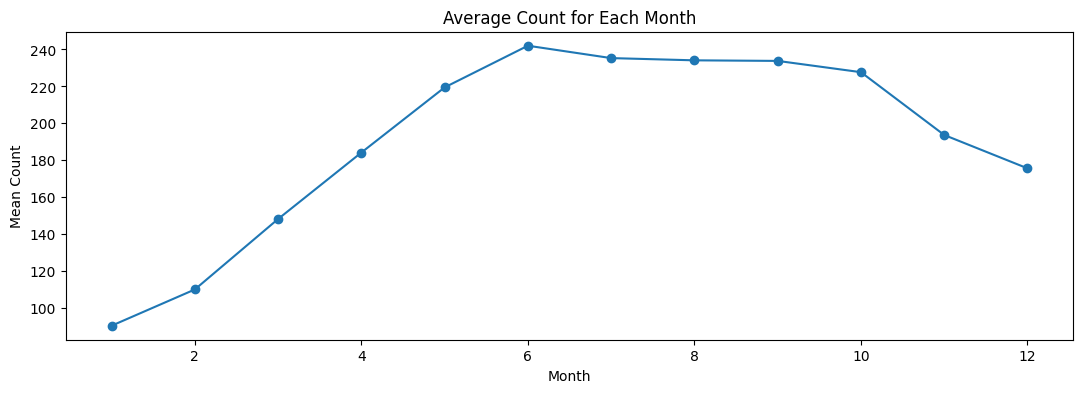

In [ ]:
#Univariate Analysis
#Count of booking by month
meanbymonth = df.groupby(df['datetime'].dt.month)['count'].mean().reset_index()
meanbymonth.columns=['month','mean']
plt.figure(figsize=(13, 4))
plt.plot(meanbymonth['month'], meanbymonth['mean'], marker='o', linestyle='-')
plt.title('Average Count for Each Month')
plt.xlabel('Month')
plt.ylabel('Mean Count')

Text(0, 0.5, 'Mean Count')

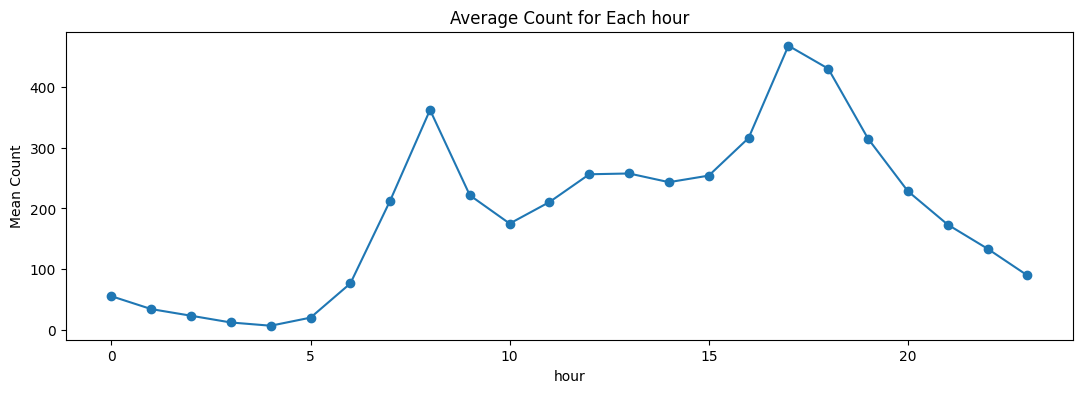

In [ ]:
#Count of booking by hour
meanbyhour = df.groupby(df['datetime'].dt.hour)['count'].mean().reset_index()
meanbyhour.columns=['hour','mean']
plt.figure(figsize=(13, 4))
plt.plot(meanbyhour['hour'], meanbyhour['mean'], marker='o', linestyle='-')
plt.title('Average Count for Each hour')
plt.xlabel('hour')
plt.ylabel('Mean Count')

Text(0, 0.5, 'Mean Count')

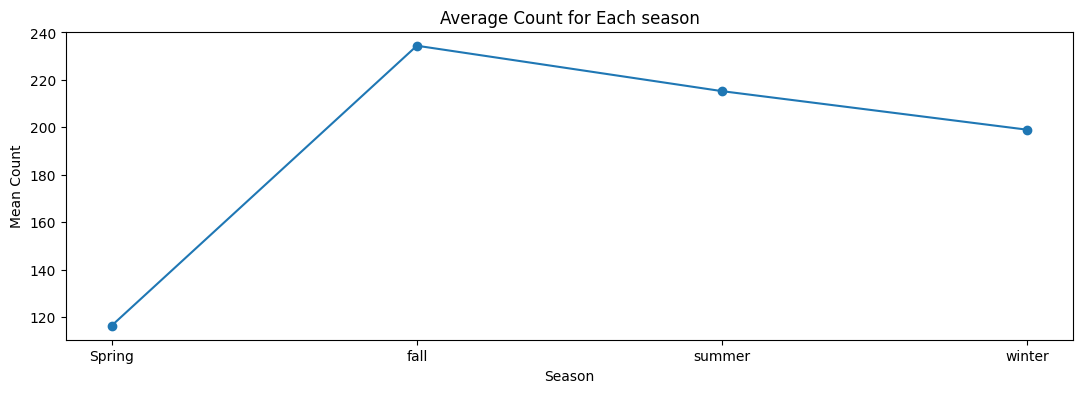

In [ ]:
#Average booking by season
meanbyseason = df.groupby(df['season'])['count'].mean().reset_index()
meanbyseason.columns=['season','mean']
plt.figure(figsize=(13, 4))
plt.plot(meanbyseason['season'], meanbyseason['mean'], marker='o', linestyle='-')
plt.title('Average Count for Each season')
plt.xlabel('Season')
plt.ylabel('Mean Count')

Text(0.5, 1.0, 'Variation of temp')

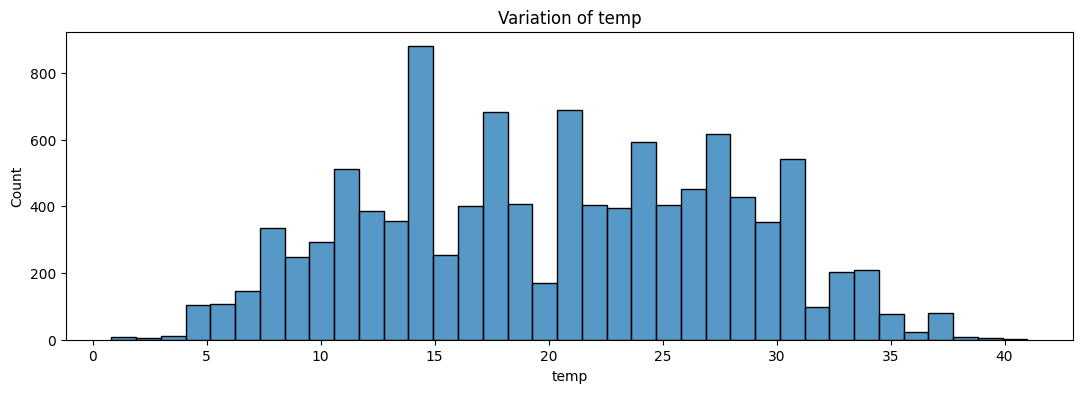

In [ ]:
#Variation of temp
plt.figure(figsize=(13, 4))
sns.histplot(x='temp',data=df)
plt.title('Variation of temp')

Text(0.5, 1.0, 'Workday vs Count')

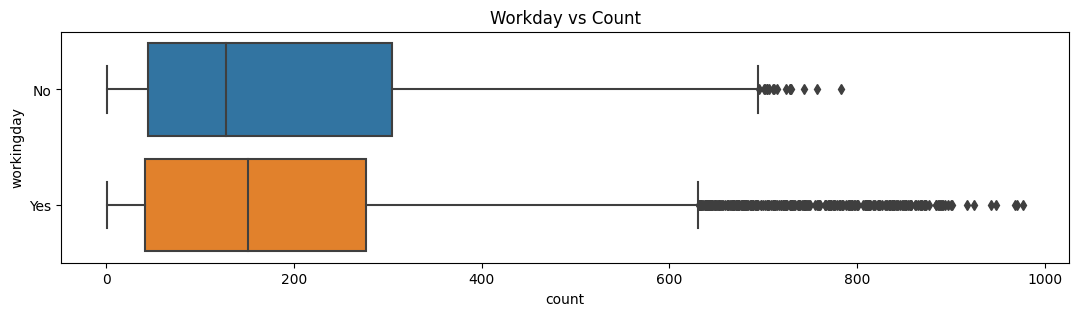

In [ ]:
#Bivariate analysis
#workday and count
plt.figure(figsize=(13, 3))
sns.boxplot(data=df,x="count",y='workingday')
plt.title('Workday vs Count')

Text(0.5, 1.0, 'Season vs Count')

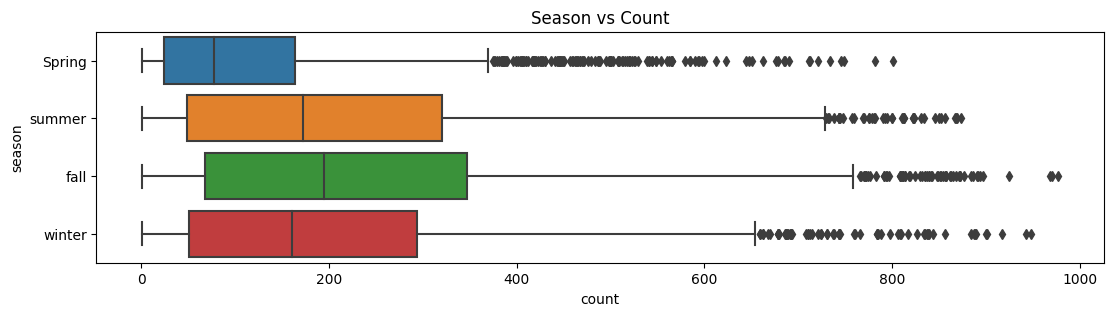

In [ ]:
#workday and count
plt.figure(figsize=(13, 3))
sns.boxplot(data=df,x="count",y='season')
plt.title('Season vs Count')

Text(0.5, 1.0, 'weather vs Count')

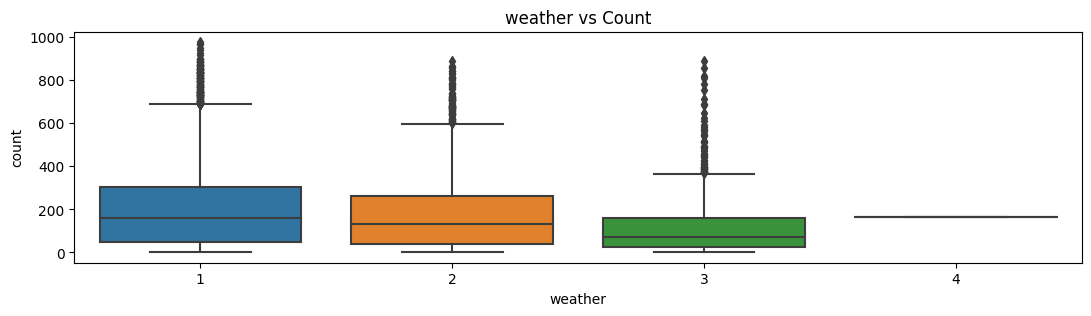

In [ ]:
#workday and count
plt.figure(figsize=(13, 3))
sns.boxplot(data=df,x="weather",y='count')
plt.title('weather vs Count')

<ipython-input-233-ac5b29c418b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".1f")


<Axes: >

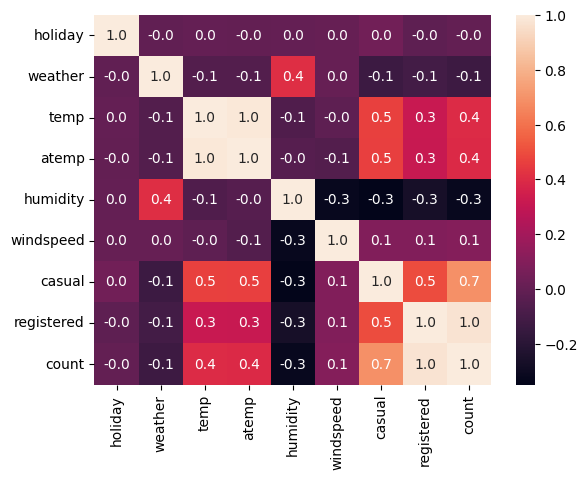

In [ ]:
#heatmap
sns.heatmap(df.corr(),annot=True,fmt=".1f")

# **Hypothesis Testing**

# **1) Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

**Null Hypthesis H0**: There is no significant difference between no.of bike rides on weekdays and weekends.

**Alternate Hypothesis H1**: There is significant difference between no. of bike rides on weekdays and weekends.

**Significance level**: 0.05 (95%)

In [ ]:
#using ttest independent to calculate between two independant groups
Working=df.loc[df['workingday'] == 'Yes']['count']
Holiday=df.loc[df['workingday'] == 'No']['count']

In [ ]:
ttest_ind(Working,Holiday,equal_var = 'True',alternative='less')

TtestResult(statistic=1.2096277376026694, pvalue=0.8867759788681933, df=10884.0)

**Inference**: Since the p value is higher than the significance level, we fail to reject null hypothesis.

**Conclusion**: So, there is no significant difference between no of bike rides on weekdays and weekends.

**Recommendations**:  The analysis shows us that majority of riders are on week days.  Also, from the visual analysis, we see that rides are mostly consumed on peak hours.  So, Yulu should focus on availability of bikes on these days and times.

================================================================================================================

# **2) Check if the demand of bicycles on rent is the same for different Weather conditions?**

**Null Hypthesis H0**: There is same demand of bicycles for different weather conditions.

**Alternate Hypothesis H1**: There is different demand of bicycles for different weather conditions.

**Significance level**: 0.05 (95%)

In [ ]:
weather1=df.loc[df['weather']==1]['count']
weather2=df.loc[df['weather']==2]['count']
weather3=df.loc[df['weather']==3]['count']
weather4=df.loc[df['weather']==4]['count']

Text(0.5, 1.0, 'weather1')

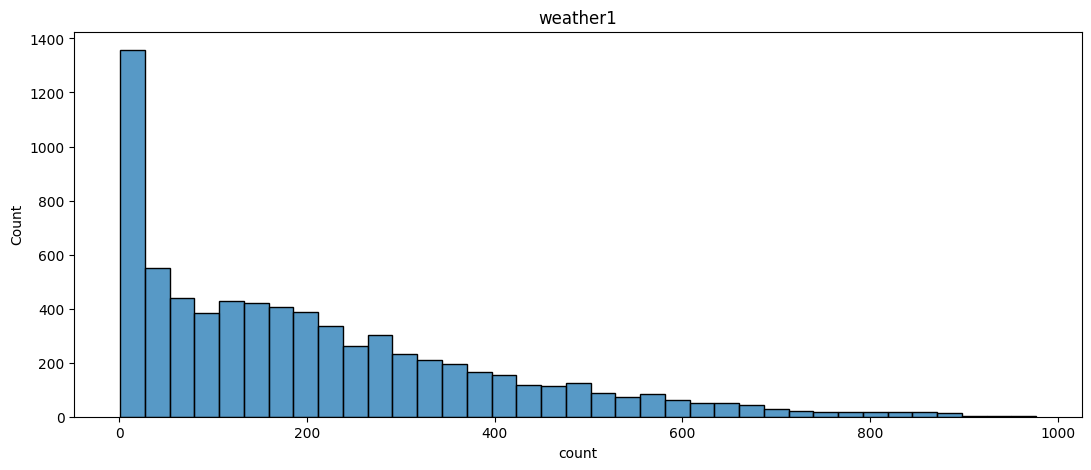

In [ ]:
#weather 1
plt.figure(figsize=(13, 5))
sns.histplot(data=weather1)
plt.title('weather1')

Text(0.5, 1.0, 'weather2')

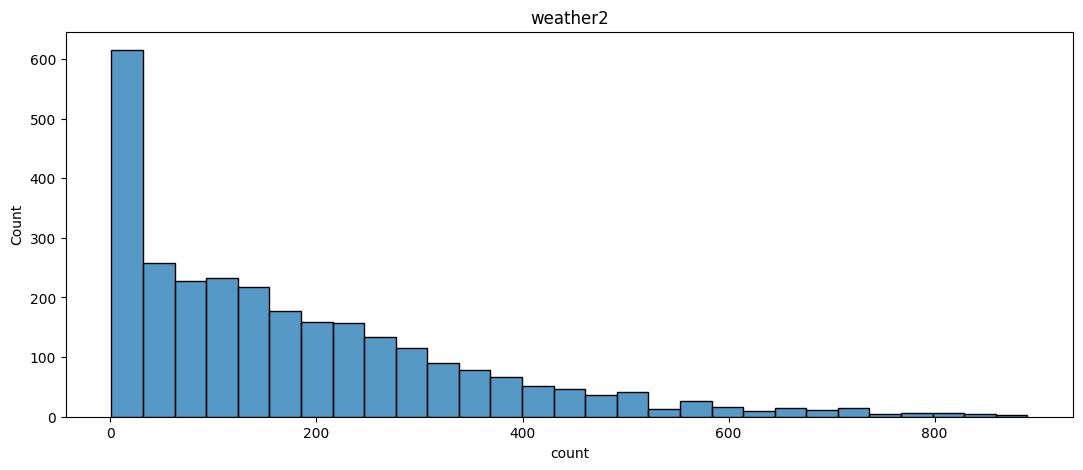

In [ ]:
#weather2
plt.figure(figsize=(13, 5))
sns.histplot(data=weather2)
plt.title('weather2')

Text(0.5, 1.0, 'weather3')

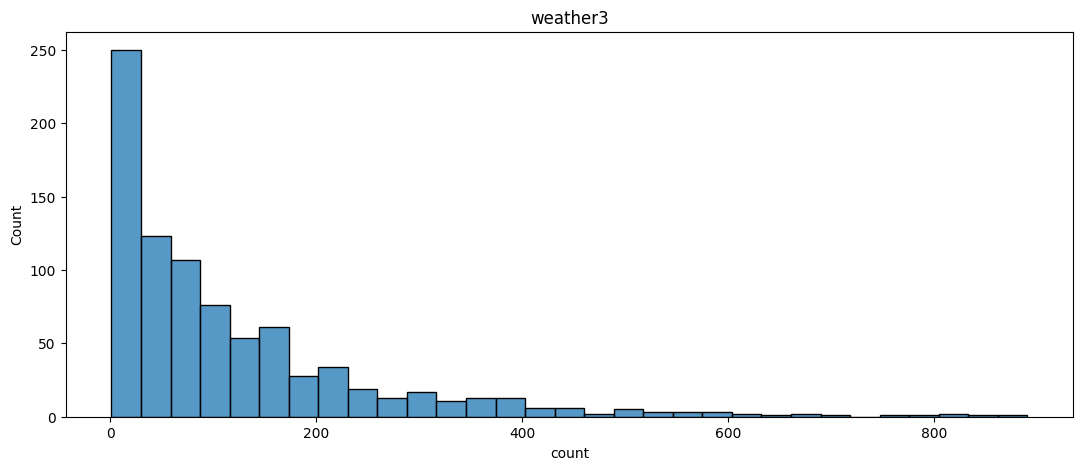

In [ ]:
#weather3
plt.figure(figsize=(13, 5))
sns.histplot(data=weather3)
plt.title('weather3')

Text(0.5, 1.0, 'weather4')

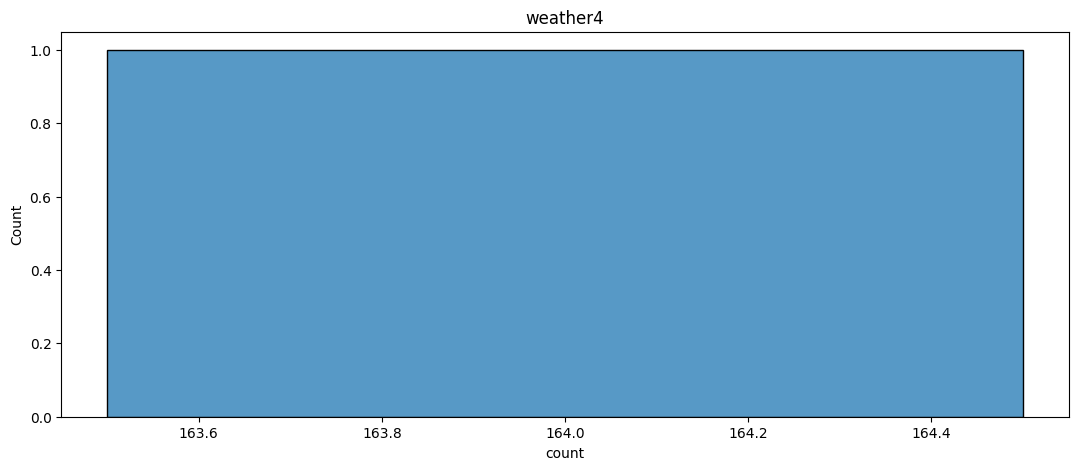

In [ ]:
#weather4
plt.figure(figsize=(13, 5))
sns.histplot(data=weather4)
plt.title('weather4')

<Figure size 1300x500 with 0 Axes>

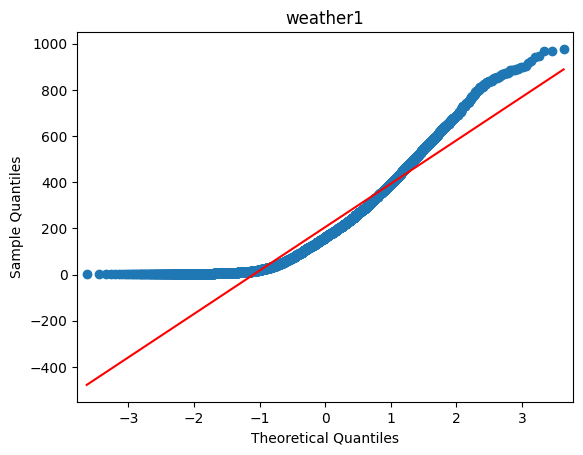

In [ ]:
qqplot(weather1,line='s')
plt.title('weather1')
plt.show()

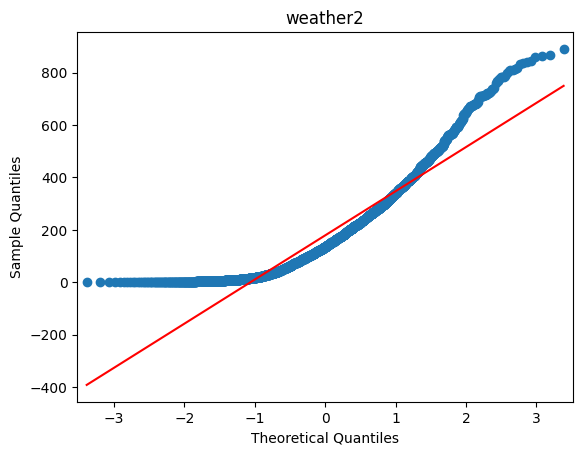

In [ ]:
qqplot(weather2,line='s')
plt.title('weather2')
plt.show()

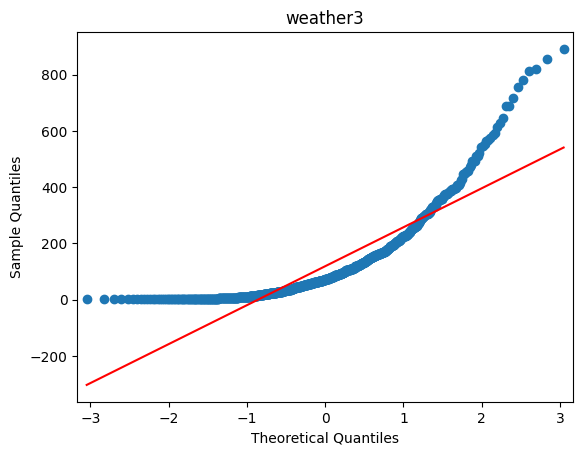

In [ ]:
qqplot(weather3,line='s')
plt.title('weather3')
plt.show()

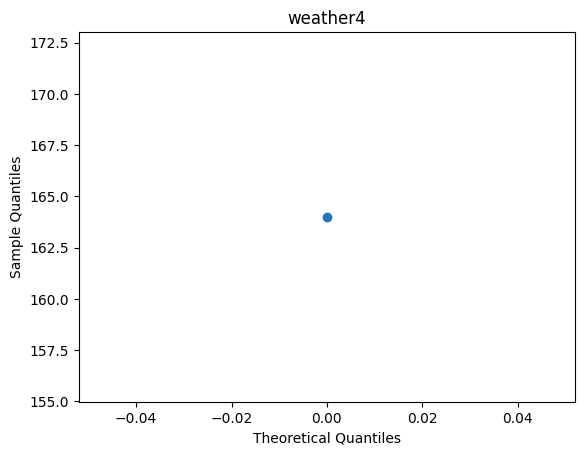

In [ ]:
qqplot(weather4,line='s')
plt.title('weather4')
plt.show()

The visual analysis via histogram and qq-plot show that the samples aren't normal.

We will confirm it using Shapiro and Levene's test

In [ ]:
clear_count=weather1.count()
mist_count=weather2.count()
snow_count=weather3.count()
rain_count=weather4.count()
a=[clear_count,mist_count,snow_count,rain_count]
a

[7192, 2834, 859, 1]

Since all the count of values are greater than 500, we cannot perform shapiro's test.  So, we will try checking the assumption of equal variance via levene's test

H0: Variance are equal

H1: Variance are not equal

Significance level, alpha=0.05 (95%)

In [ ]:
levene(weather1,weather2,weather3,weather4)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

The Pvalue is lesser than alpha value.  We reject null.

So, Variances are not equal among weather.

Since the samples doesn't satisfy the assumptions of **ANOVA**.  We proceed to test it with **Kruskal**

**Kruskal test**

**Null Hypthesis H0**: There is same demand of bicycles for different weather conditions.

**Alternate Hypothesis H1**: There is different demand of bicycles for different weather conditions.

**Significance level, alpha**: 0.05 (95%)

In [ ]:
kruskal(weather1,weather2,weather3,weather4)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

**Inference**: Since the P value is lesser than alpha, we reject the null hypothesis.

**Conclusion**: **There is different demand of bicycles for different weather conditions.**

**Recommendations**:  Provide stable supply of bikes irrespecive of


========================================================================================================================

# **3) Check if the demand of bicycles on rent is the same for different Seasons?**

**Null Hypthesis H0**: There is same demand of bicycles for different seasons.

**Alternate Hypothesis H1**: There is different demand of bicycles for different seasons.

**Significance level**: 0.05 (95%)

In [ ]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,0,No,1,9.84,14.395,81,0.0,3,13,16


In [ ]:
spring=df.loc[df['season']=='Spring']['count']
summer=df.loc[df['season']=='summer']['count']
fall=df.loc[df['season']=='fall']['count']
winter=df.loc[df['season']=='winter']['count']

Text(0.5, 1.0, 'spring')

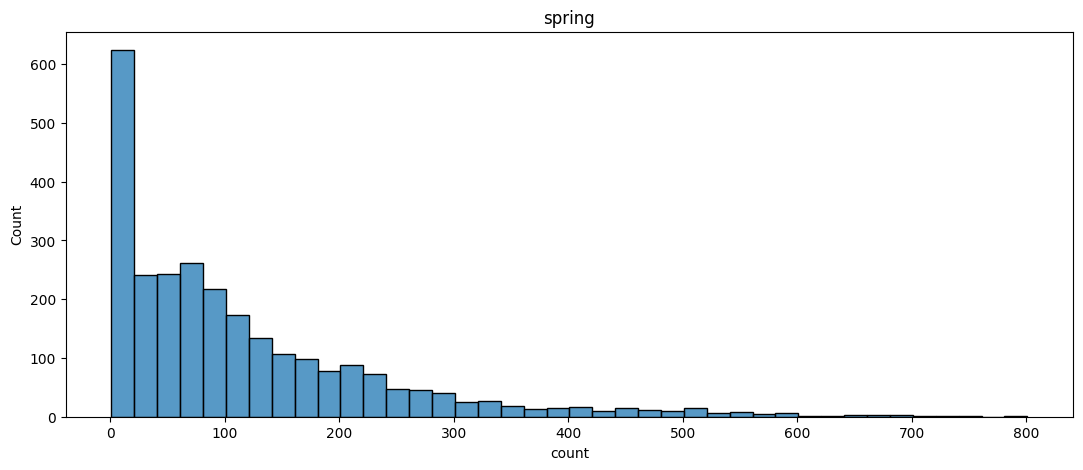

In [ ]:
#spring
plt.figure(figsize=(13, 5))
sns.histplot(data=spring)
plt.title('spring')

Text(0.5, 1.0, 'summer')

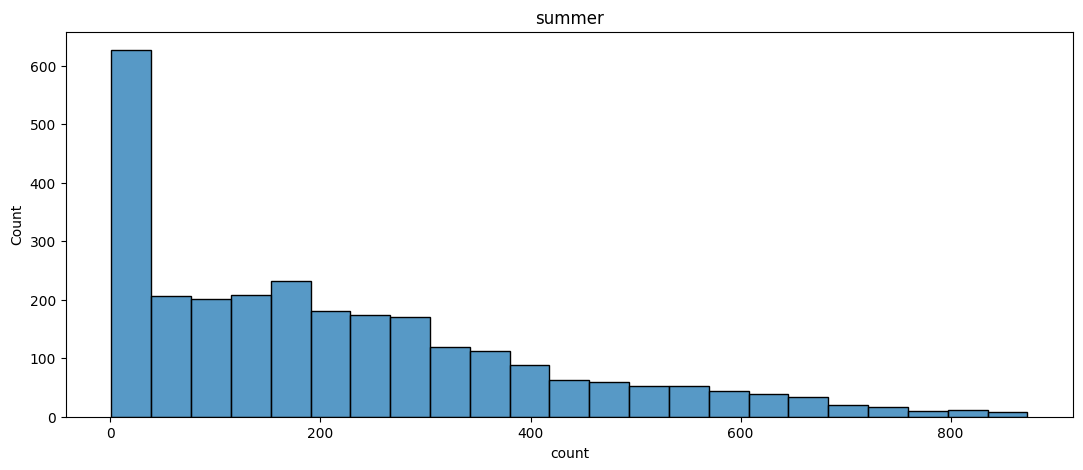

In [ ]:
#summer
plt.figure(figsize=(13, 5))
sns.histplot(data=summer)
plt.title('summer')

Text(0.5, 1.0, 'fall')

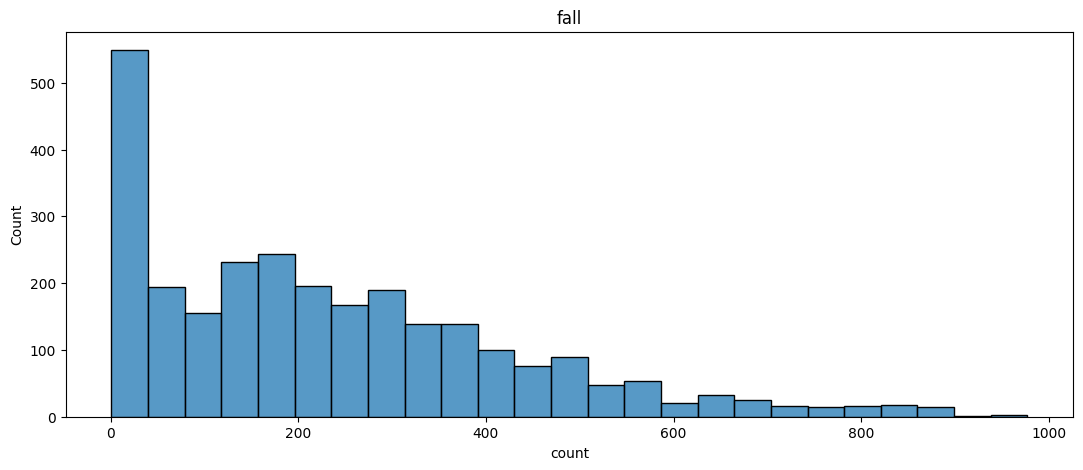

In [ ]:
#summer
plt.figure(figsize=(13, 5))
sns.histplot(data=fall)
plt.title('fall')

Text(0.5, 1.0, 'winter')

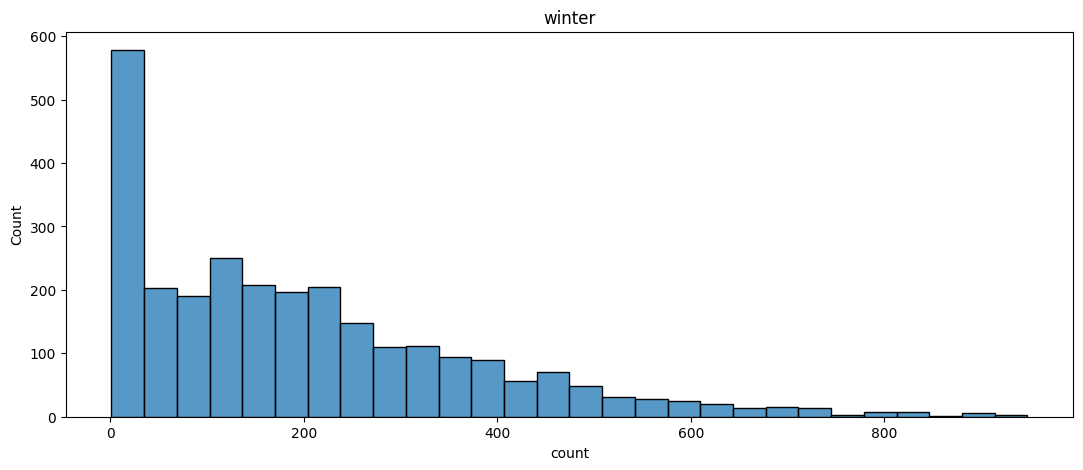

In [ ]:
#summer
plt.figure(figsize=(13, 5))
sns.histplot(data=winter)
plt.title('winter')

<function matplotlib.pyplot.show(close=None, block=None)>

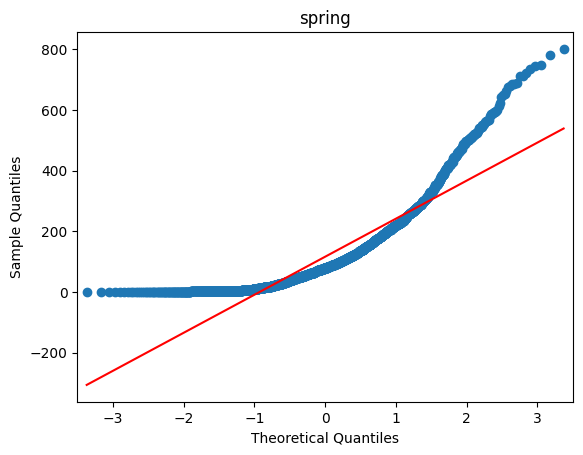

In [ ]:
qqplot(spring,line='s')
plt.title('spring')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

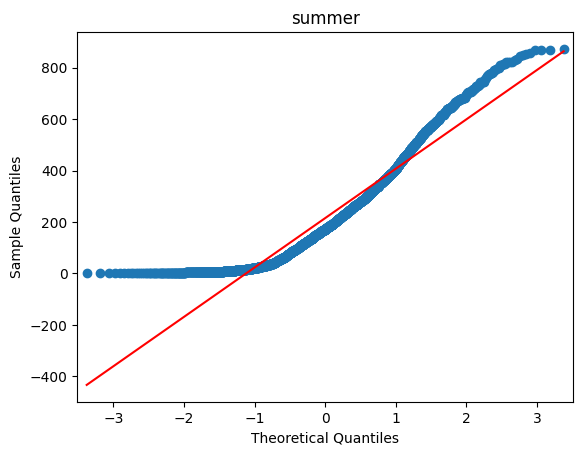

In [ ]:
qqplot(summer,line='s')
plt.title('summer')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

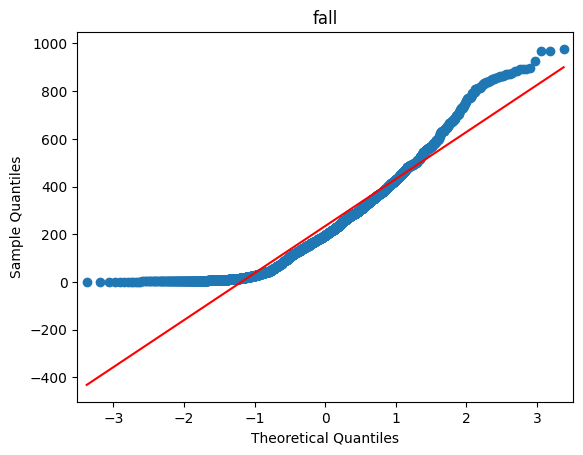

In [ ]:
qqplot(fall,line='s')
plt.title('fall')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

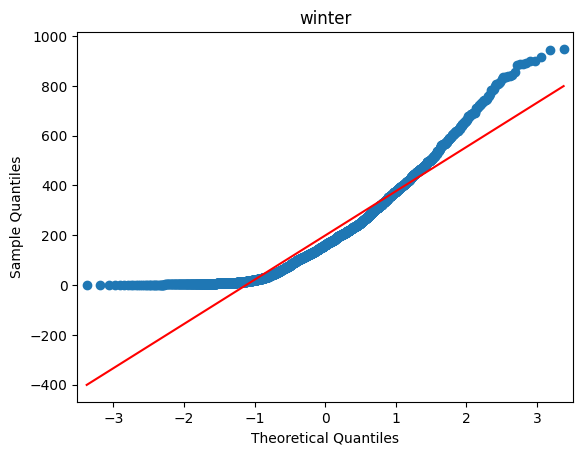

In [ ]:
qqplot(winter,line='s')
plt.title('winter')
plt.show

The visual analysis show that the samples aren't normal via histogram and qq-plot

We will confirm it using Shapiro and Levene's test

In [ ]:
spring_count=spring.count()
summer_count=summer.count()
fall_count=fall.count()
winter_count=winter.count()
a=[spring_count,summer_count,fall_count,winter_count]
a

[2686, 2733, 2733, 2734]

Since all the count of values are greater than 500, we cannot perform shapiro's test.  So, we will try checking the assumption of equal variance via levene's test

H0: Variance are equal

H1: Variance are not equal

Significance level, alpha=0.05 (95%)

In [ ]:
levene(spring,summer,fall,winter)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

The Pvalue is lesser than alpha value.  We reject null.

So, Variances are not equal among weather.

Since the samples doesn't satisfy the assumptions of **ANOVA**.  We proceed to test it with **Kruskal**

**Kruskal test**

**Null Hypthesis H0**: There is same demand of bicycles for different seasons.

**Alternate Hypothesis H1**: There is different demand of bicycles for seasons.

**Significance level, alpha**: 0.05 (95%)

In [ ]:
kruskal(spring,summer,fall,winter)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

Since the P value is lesser than alpha, we reject the null hypothesis.

**Conclusion**: **There is different demand of bicycles for different seasons.**


# **4) Check if the Weather conditions are significantly different during different Seasons?**

In [ ]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,0,No,1,9.84,14.395,81,0.0,3,13,16


As the columns weather and seasons are categorical, we will use Chisquare test to check the hypothesis.

Since this is testing independence, we will use Test of independence and chi2_contingency

**Null Hypothesis H0**: Weather is independent of season.

**Alternate Hypothesis H1**: Weather is dependent of season.

Significance level, alpha level=0.05 (95%)

Let us form a crosstab table to verify this.

In [ ]:
#cross tab table

data=pd.crosstab(df['season'],df['weather'])
data

weather,1,2,3,4
season,,,,
Spring,1759,715,211,1
fall,1930,604,199,0
summer,1801,708,224,0
winter,1702,807,225,0


In [ ]:
chi_stat,p,dof,exp_freq=chi2_contingency(data)
chi_stat,p

(49.158655596893624, 1.549925073686492e-07)

The P value is less than alpha.  So, we reject null hypothesis.

**Conclusion**: Weather is dependant of season.

# **Insights**:


1) The date ranges from 2011-01-01 to 2012-12-19 covering 718 days

2) The temperature ranges from 41 celisus to lowest of 0.82 celisus with average temp of 20.23 degree celisus

3) The average humidity is 61.88

4) The windspeed ranges from 0 to 56 with average of 12.79

5) 75% of the rides have less than 31 deg celisus of feel temp

6) 75% of the rides have 16 as windspeed

7) The average count of users is low in January with peak in June

8) The average count of users is low in 4AM with peak in 5PM and average around 10AM

9) The average count of users varies seasonably with lowest in spring and highest in fall

10) Working day and spring seasons has more outliers.

11) There is no significant difference between no of bike rides on weekdays and weekends.

12) There is different demand of bicycles for different weather conditions.

13) There is different demand of bicycles for different seasons.
Weather is dependant of season.

# **Recommendations:**

**Weather based**:  People tend to rent more during clear skies as this is two wheeler.  Yulu can give more discounts during rainy and winter seasons to increase rides.  Also, yulu can imporve bike efficiency during high temperature days to get more rides as the max temp is 41 and 75% of ride is under 31

**Season based**: Yulu should focus on spring season as the demand is seen lowest.  Spring season falls on march and april which is pleasant weather season.  So, ideally, there should not be any decrease in demand.  Yulu can provide discounts on these period to increase rides

**Time based**:  Rentals get high during 5PM in the evening, yulu should focus on bikes availability during this hour.

**Month based**: June month has highest demand, yulu should focus on bikes availability at these times.

Yulu can create premier services and offer extra benefits to them like extra free rides etc.

There is no customer feedback data in the table, they can create a mechanism and that will help to improve rides.

Periodical maintenance of bikes will help in timely usage of it.

In real times, we have seen people abandon bikes on road sides without putting on shed or parking area.  This should be tracked via GPS and customers should be alerted to maintain bike's life.